In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [3]:
ir = load_iris()
ir

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
ir.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
x  =pd.DataFrame(ir.data)
x.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
x.columns = ["sepal_length", "sepal_width", "petal_lenght", "petal_width"]

In [7]:
x.head()

,sepal_length,sepal_width,petal_lenght,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y = pd.DataFrame(ir.target)
y.columns =["type"]

In [9]:
y.head()

,type
0,0
1,0
2,0
3,0
4,0


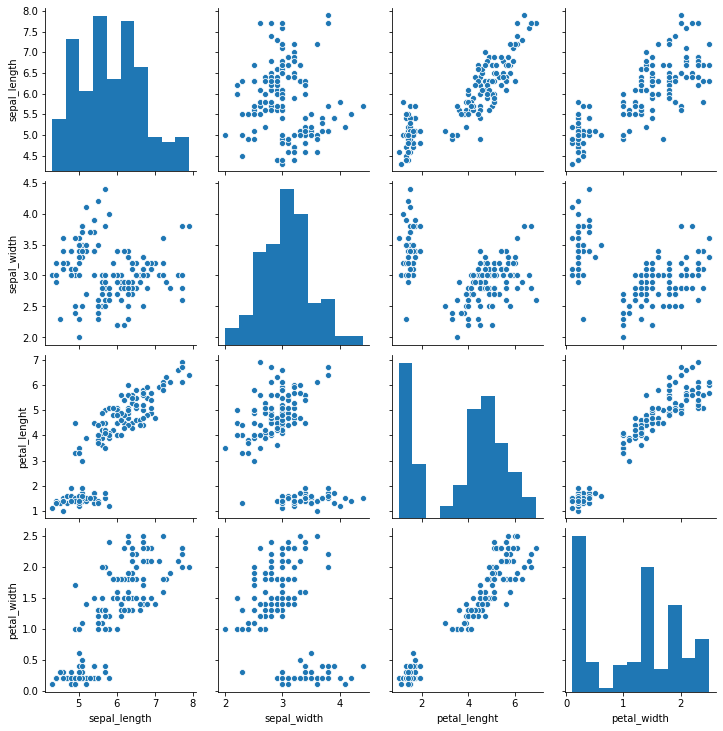

In [10]:
sns.pairplot(x)

In [11]:
import warnings
warnings.filterwarnings("ignore")


mnb = MultinomialNB()
score = cross_val_score(mnb, x, y, cv=5)
score

array([1.        , 0.96666667, 0.9       , 0.9       , 1.        ])

In [12]:
score.mean()

0.9533333333333334

In [13]:
score.std()

0.04521553322083511

In [14]:
y_pred = cross_val_predict(mnb, x, y, cv=5)

In [15]:
print(confusion_matrix(y_pred, y))

[[50  0  0]
 [ 0 46  3]
 [ 0  4 47]]


In [16]:
sv = SVC()
score_svc = cross_val_score(sv, x, y, cv = 5)
print("score", score_svc)
print("mean", score_svc.mean())
print("standard deviation", score_svc.std())

score [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
mean 0.9666666666666666
standard deviation 0.02108185106778919


In [17]:
pred_svc = cross_val_predict(sv, x, y, cv=5)
confusion_matrix(pred_svc,y)

array([[50,  0,  0],
       [ 0, 48,  3],
       [ 0,  2, 47]])

In [18]:
kn = KNeighborsClassifier()
score_kn = cross_val_score(kn, x, y, cv=5)
pred_kn = cross_val_predict(kn, x, y, cv = 5)
print("score", score_kn)
print("mean score", score_kn.mean())
print("standard devition", score_kn.std())
print("confusion_matrix", confusion_matrix(pred_kn, y))

score [0.96666667 1.         0.93333333 0.96666667 1.        ]
mean score 0.9733333333333334
standard devition 0.02494438257849294
confusion_matrix [[50  0  0]
 [ 0 47  1]
 [ 0  3 49]]


In [19]:
dt = DecisionTreeClassifier()
score_dt = cross_val_score(dt, x, y, cv=5)
pred_kn = cross_val_predict(dt, x, y, cv=5)
print("score", score_dt)
print("mean", score_dt.mean())
print("standard deviation", score_dt.std())
print("confusion matrix", confusion_matrix(pred_kn, y))

score [0.96666667 0.96666667 0.9        0.93333333 1.        ]
mean 0.9533333333333334
standard deviation 0.03399346342395189
confusion matrix [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


# Hyperparameter tuning


In [20]:
from sklearn.model_selection import GridSearchCV

parameters= {
    "kernel":["linear", "poly","rbf"], "C":[1,10]
}

clf = GridSearchCV(sv, parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


# Ensemble techniques

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

rf = RandomForestClassifier(n_estimators  =100, random_state = 42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print("accuracy score", accuracy_score(pred, y_test))
print("classification_report", classification_report(pred, y_test))
print("confusion_matrix", confusion_matrix(pred, y_test))

accuracy score 0.98
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

confusion_matrix [[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]


In [23]:
    #adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
pred = abc.predict(x_test)
print("accuracy score", accuracy_score(pred, y_test))
print("classification report", classification_report(pred, y_test))
print("confusion_matrix", confusion_matrix(pred, y_test))

accuracy score 0.92
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.79      0.88        19
           2       0.75      1.00      0.86        12

    accuracy                           0.92        50
   macro avg       0.92      0.93      0.91        50
weighted avg       0.94      0.92      0.92        50

confusion_matrix [[19  0  0]
 [ 0 15  4]
 [ 0  0 12]]


In [24]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators =50)
ab.fit(x_train, y_train)
pred = ab.predict(x_test)
print("accuracy score", accuracy_score(pred, y_test))
print("classification report", classification_report(pred, y_test))
print("confusion_matrix", confusion_matrix(pred, y_test))

accuracy score 0.92
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.79      0.88        19
           2       0.75      1.00      0.86        12

    accuracy                           0.92        50
   macro avg       0.92      0.93      0.91        50
weighted avg       0.94      0.92      0.92        50

confusion_matrix [[19  0  0]
 [ 0 15  4]
 [ 0  0 12]]


In [26]:
svc= SVC()
ab1 = AdaBoostClassifier(n_estimators =50, base_estimator  =svc, algorithm="SAMME")
ab1.fit(x_train, y_train)
pred = ab1.predict(x_test)
print("accuracy score", accuracy_score(pred, y_test))
print("classification report", classification_report(pred, y_test))
print("confusion_matrix", confusion_matrix(pred, y_test))

accuracy score 0.3
classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.30      0.46        50
           2       0.00      0.00      0.00         0

    accuracy                           0.30        50
   macro avg       0.33      0.10      0.15        50
weighted avg       1.00      0.30      0.46        50

confusion_matrix [[ 0  0  0]
 [19 15 16]
 [ 0  0  0]]
